# Project 7

In [1]:
!%pip install networkx matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import zipfile
import requests
import tempfile
import os
import numpy as np
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random
import seaborn as sns
from scipy import stats
import networkit as nk
#!pip install powerlaw
import powerlaw
import collections
from scipy.stats import ks_2samp
from scipy.stats import poisson


'%pip' is not recognized as an internal or external command,
operable program or batch file.


P7.7 Check with simulation the above result. Plot the size of the largest cluster as a function of ⟨k⟩= pN. [1P]

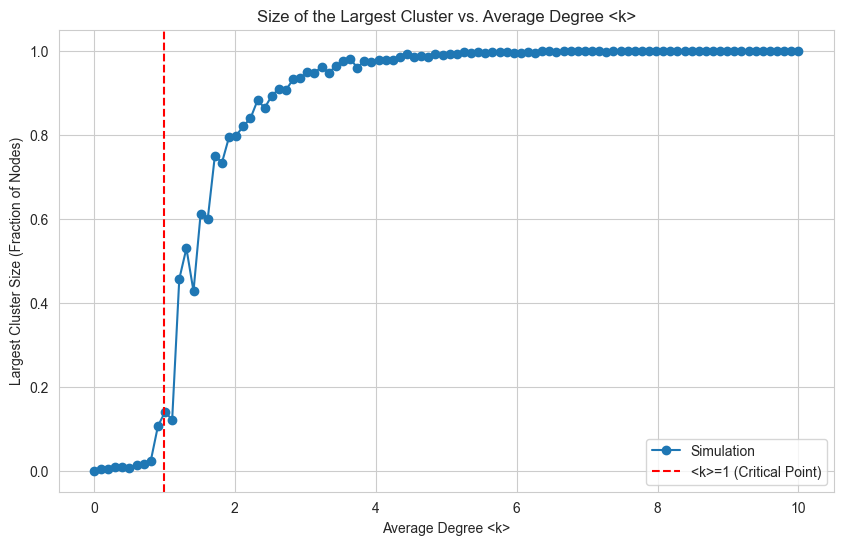

In [2]:
N = 1000
p_values = np.linspace(0, 0.01, 100)
average_degrees = p_values * N  # <k> = p * N

largest_cluster_sizes = []

for p in p_values:
    G = nx.erdos_renyi_graph(N, p)
    cluster_sizes = [len(c) for c in nx.connected_components(G)]
    largest_cluster_sizes.append(max(cluster_sizes))

plt.figure(figsize=(10, 6))
plt.plot(average_degrees, np.array(largest_cluster_sizes) / N, marker='o', linestyle='-', label="Simulation")
plt.axvline(x=1, color='r', linestyle='--', label="<k>=1 (Critical Point)")
plt.title("Size of the Largest Cluster vs. Average Degree <k>")
plt.xlabel("Average Degree <k>")
plt.ylabel("Largest Cluster Size (Fraction of Nodes)")
plt.legend()
plt.grid(True)
plt.show()


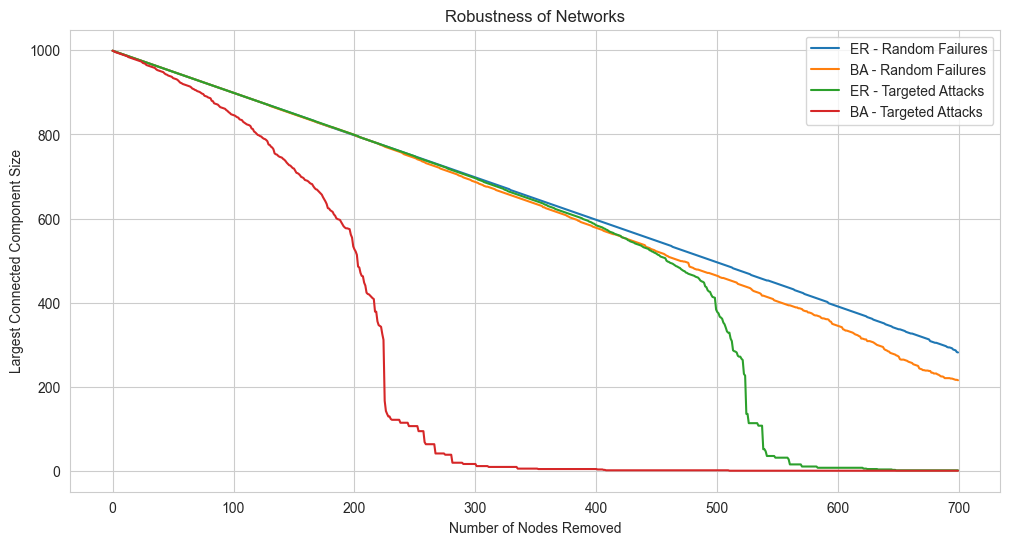

In [3]:
def simulate_failures(graph, num_removals, strategy='random'):
    G = graph.copy()
    sizes = []
    
    for _ in range(num_removals):
        if strategy == 'random':
            node = random.choice(list(G.nodes))
        elif strategy == 'targeted':
            node = max(G.degree, key=lambda x: x[1])[0]
        
        G.remove_node(node)
        sizes.append(len(max(nx.connected_components(G), key=len)))
    
    return sizes

n = 1000 
p = 0.01
m = 3
removals = 700

er_graph = nx.erdos_renyi_graph(n, p)
sf_graph = nx.barabasi_albert_graph(n, m)

er_random = simulate_failures(er_graph, num_removals=removals, strategy='random')
sf_random = simulate_failures(sf_graph, num_removals=removals, strategy='random')

er_targeted = simulate_failures(er_graph, num_removals=removals, strategy='targeted')
sf_targeted = simulate_failures(sf_graph, num_removals=removals, strategy='targeted')

plt.figure(figsize=(12, 6))
plt.plot(er_random, label="ER - Random Failures")
plt.plot(sf_random, label="BA - Random Failures")
plt.plot(er_targeted, label="ER - Targeted Attacks")
plt.plot(sf_targeted, label="BA - Targeted Attacks")
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Largest Connected Component Size")
plt.legend()
plt.title("Robustness of Networks")
plt.show()
